# Visualisations

**Today - Data visualisation in python** 
We'll be using the `plot.ly` library.

### Load data set


In [47]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px

pd.options.plotting.backend = "plotly"

In [3]:
df = pd.read_csv(r"../data/restaurants.csv", parse_dates = ['visit_date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                252108 non-null  object        
 1   visit_date        252108 non-null  datetime64[ns]
 2   visitors          252108 non-null  int64         
 3   calendar_date     252108 non-null  object        
 4   day_of_week       252108 non-null  object        
 5   holiday           252108 non-null  int64         
 6   genre             252108 non-null  object        
 7   area              252108 non-null  object        
 8   latitude          252108 non-null  float64       
 9   longitude         252108 non-null  float64       
 10  reserve_visitors  108394 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 21.2+ MB


In [5]:
df.head()

,id,visit_date,visitors,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN


### Start to understand visualisations - history

* **matplotlib** was an early library used to do visualisations in python.
    * Very powerful, but could be a pain to use
    * Lot of accumulated knowledge on how to do things using this
    * Up until 2010 it was pretty much the main tool, and it's also used to do lots of plotting in pandas
    * default charts look older
    
    

* Whenever you have a dataframe in pandas, can use the `.plot` method
    * Built from matplotlib
    * Gives a line chart by default
    * Can use `;` to silence out put in python
    * Can use matplotlib to style charts in python
    * generally use `matplotlib.pyplot`
    
* Limitations of this library
    * Things tend not travel well outside of Jupyter
    * matplotlib - often doesn't capture new data vis techniques
    * Often hard to embed out into larger projects
    * So good for simple standard things in Jupyter


* **Often need to be careful data is set up in the right format**
    * Typically need to transform your data first

In [6]:
df.groupby('visit_date')['visitors'].sum()

visit_date
2016-01-01     1033
2016-01-02     1764
2016-01-03     2368
2016-01-04     3326
2016-01-05     3927
              ...  
2017-04-18    13489
2017-04-19    14607
2017-04-20    13990
2017-04-21    19624
2017-04-22    21245
Name: visitors, Length: 478, dtype: int64

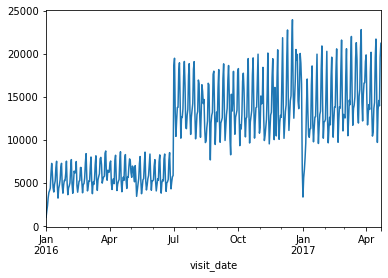

In [7]:
df.groupby('visit_date')['visitors'].sum().plot()

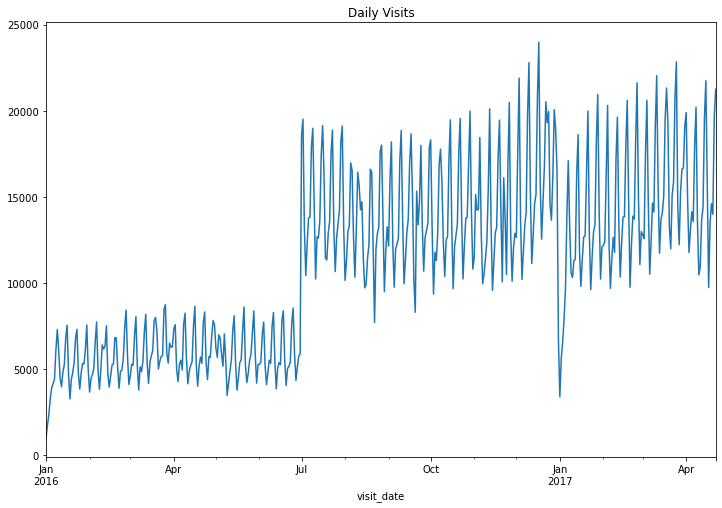

In [9]:
df.groupby('visit_date')['visitors'].sum().plot(figsize=(12,8), title='Daily Visits');

In [12]:
import matplotlib.pyplot as plt
plt.style.available
plt.style.use('ggplot')

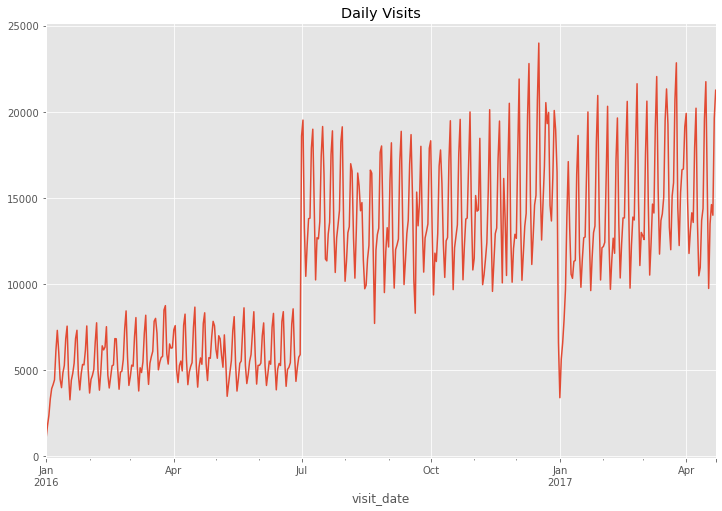

In [13]:
# This now usees the pre-existing palette, tends to be a more appealing look!
df.groupby('visit_date')['visitors'].sum().plot(figsize=(12,8), title='Daily Visits');

In [15]:
# To see the arguments and options for the plot function
?df.plot

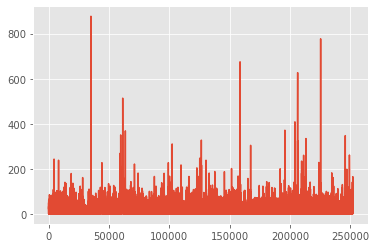

In [16]:
# Try this - not that useful, need data in the right format
df['visitors'].plot()

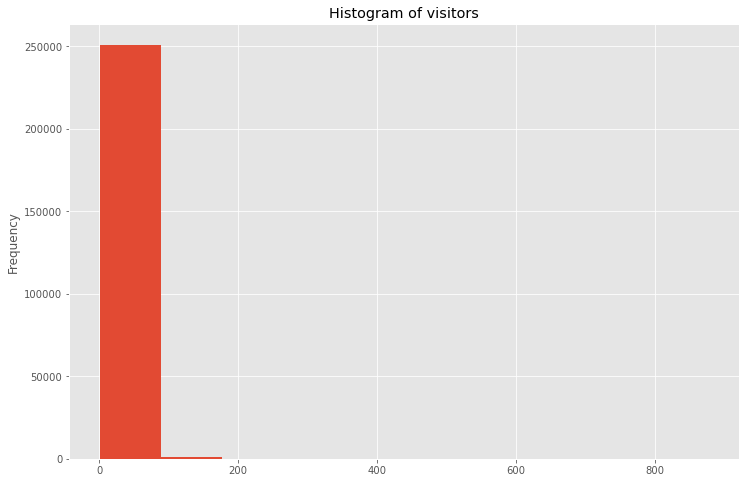

In [18]:
df['visitors'].plot(kind='hist', title = 'Histogram of visitors', figsize = (12,8))

# Visualisations - the modern python way

An approach that works better/similarly to PowerBI / Tableau

Two more modern libraries are:
* Seaborn
* plot.ly

**Seaborn**
* Probably most commonly used right now
* Built around 2011
* Quickly caught on, and is frequently used

**Plotly**
A more modern approach is to use the `plot.ly` library
* https://plotly.com/
* Handles visualisation (graphing library) and Dash (dashboarding engine to deploy interactive ML outputs)
* Compiles down to javascript, so plays nicely on the web
* More broadly used in a corporate environment
* Developed in 2015, picks up where Seaborn left off
* Probably somewhat future proof, since this looks like it is kept up to date

**Why Plot.ly?**
* More charts than seaborn (36-40 vs 20)
* Can feed it into webapps more easily / built from scratch to deploy online
* Backed by a company, so can buy enterprise support and is actively developed
* Handles
    * Network visualisation
    * Interactions
    * Spatial Data Support (i.e. lattitude and longitude; can often generate easily from an address)
    * Pandas Integration


### Using Plotly

Has a low-level api and high-level api.
* Graph_objects -- low level -- all other API's are based of of this
    * Even though have plotly express can still go into graph_objects to adjust and make exactly what you want
* Plot.ly_express -- high vel 
    * -- good wrappper, simplifies code 5-10 fold
    * typically access a good vis with a single function call
    * captures most high level use cases, so probably handles 80% of what you want to do
    
    

You can move from one to the other pretty easily if you are trying to do something very specific. 

* `import plotly.graph_objects as go` -- Low level library
* `import plotly.express as px` -- High lievel library

Setting it up as Pandas backend:
* `pd.options.plotting.backend = "plotly"`
* 


* Overview of all the charts: https://plotly.com/python/

* Other examples: http://www.jonathanbech.tel/ml-explorer/

In [8]:
# this is the low-level api
import plotly.graph_objects as go

# high-level api
import plotly.express as px

In [20]:
# ! pip install plotly
# The ! lets me install the data

Start setting keys..
Keys set.
     |████████████████████████████████| 13.1 MB 13.2 MB/s eta 0:00:01
Using legacy 'setup.py install' for retrying, since package 'wheel' is not installed.
    Running setup.py install for retrying ... done


In [9]:
fig1 = go.Figure()
# Figure - contains lots of knobs for us to turn

In [12]:
data = df.groupby(['visit_date','day_of_week'])['visitors'].sum().reset_index()

In [14]:
data.head()

,visit_date,day_of_week,visitors
0,2016-01-01,Friday,1033
1,2016-01-02,Saturday,1764
2,2016-01-03,Sunday,2368
3,2016-01-04,Monday,3326
4,2016-01-05,Tuesday,3927


In [17]:
dir(go) # Shows things that follow the go. ; Can also see with go. and hit tab

['AngularAxis',
 'Annotation',
 'Annotations',
 'Area',
 'Bar',
 'Barpolar',
 'Box',
 'Candlestick',
 'Carpet',
 'Choropleth',
 'Choroplethmapbox',
 'ColorBar',
 'Cone',
 'Contour',
 'Contourcarpet',
 'Contours',
 'Data',
 'Densitymapbox',
 'ErrorX',
 'ErrorY',
 'ErrorZ',
 'Figure',
 'FigureWidget',
 'Font',
 'Frame',
 'Frames',
 'Funnel',
 'Funnelarea',
 'Heatmap',
 'Heatmapgl',
 'Histogram',
 'Histogram2d',
 'Histogram2dContour',
 'Histogram2dcontour',
 'Image',
 'Indicator',
 'Isosurface',
 'Layout',
 'Legend',
 'Line',
 'Margin',
 'Marker',
 'Mesh3d',
 'Ohlc',
 'Parcats',
 'Parcoords',
 'Pie',
 'Pointcloud',
 'RadialAxis',
 'Sankey',
 'Scatter',
 'Scatter3d',
 'Scattercarpet',
 'Scattergeo',
 'Scattergl',
 'Scattermapbox',
 'Scatterpolar',
 'Scatterpolargl',
 'Scatterternary',
 'Scene',
 'Splom',
 'Stream',
 'Streamtube',
 'Sunburst',
 'Surface',
 'Table',
 'Trace',
 'Treemap',
 'Violin',
 'Volume',
 'Waterfall',
 'XAxis',
 'XBins',
 'YAxis',
 'YBins',
 'ZAxis',
 'area',
 'bar',
 '

In [21]:
# Standard command to add data to chart. Trace is chart component | Scatter adds a line
fig1.add_trace(go.Scatter(x=data['visit_date'], y=data['visitors']))

In [19]:
type(fig1)

plotly.graph_objs._figure.Figure

In [25]:
fig1.update_layout(title = 'Our Chart Title', colour) 

# Lets you modify basically anythig you want to. Master way to modify the appearance of a chart

In [31]:
fig2 = px.line(data, x='visit_date', y='visitors', title = 'Visitors by Day',color = 'day_of_week')



In [35]:
fig1 = go.Figure
for day in data.day_of_week.unique():        
    fig1.add_trace(go.Scatter(x=data[data.day_of_week == day]['visit_date'],y=data[data.day_of_week == day]['visitors']))
fig1.update_layout(title = 'Our Chart Title') 
 

TypeError: add_trace() missing 1 required positional argument: 'trace'

In [34]:
fig2.update_layout(title='Our New Title')
# Can apply standard graph_objects methods to plotly express

#### Animations Examples:

In [38]:
# create a grouping for the chart
data = df.groupby('visit_date')[['visitors', 'reserve_visitors']].sum().reset_index()
# create a column for day of the week to use for later charts
data['day'] = data.visit_date.dt.day_name()
# simple scatter chart
px.scatter(data, x='visitors', y='reserve_visitors',color='day')

In [40]:
px.scatter(data, x='visitors', y='reserve_visitors',animation_frame='day')

In [ ]:
# run this to set plotly as the default back end
pd.options.plotting.backend = "plotly"

In [43]:
df.groupby(['visit_date','genre'])[['visitors']].sum().reset_index()

,visit_date,genre,visitors
0,2016-01-01,Bar/Cocktail,136
1,2016-01-01,Cafe/Sweets,266
2,2016-01-01,Creative cuisine,7
3,2016-01-01,Dining bar,106
4,2016-01-01,Italian/French,23
...,...,...,...
6171,2017-04-22,Karaoke/Party,155
6172,2017-04-22,Okonomiyaki/Monja/Teppanyaki,521
6173,2017-04-22,Other,606
6174,2017-04-22,Western food,439


In [46]:
df.groupby(['visit_date','genre'])[['visitors']].sum().reset_index()

,visit_date,genre,visitors
0,2016-01-01,Bar/Cocktail,136
1,2016-01-01,Cafe/Sweets,266
2,2016-01-01,Creative cuisine,7
3,2016-01-01,Dining bar,106
4,2016-01-01,Italian/French,23
...,...,...,...
6171,2017-04-22,Karaoke/Party,155
6172,2017-04-22,Okonomiyaki/Monja/Teppanyaki,521
6173,2017-04-22,Other,606
6174,2017-04-22,Western food,439


In [48]:
df.groupby(['visit_date','genre'])[['visitors']].sum().reset_index().plot(x='visit_date',y='visitors',color='genre')